# Stock Price Prediction Supervised Learning


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Importing libraries

In [2]:
# !pip3 install --upgrade pandas
# pd.__version__

In [9]:
import pandas as pd
import numpy as np

import math,datetime
import time

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split


style.use ('ggplot')

### Loading Dataset

In [10]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock prediction project/GOOG2.csv',index_col='Date',parse_dates=True)

In [11]:
print(df.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-08-19  49.813286  51.835709  47.800831  49.982655  49.982655  44871300
2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942800
2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342800
2004-08-24  55.412300  55.591629  51.591621  52.239193  52.239193  15319700
2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232100


In [12]:
df.drop(['Adj Close'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
2020-04-22,1245.540039,1285.613037,1242.000000,1263.209961,2093100
2020-04-23,1271.550049,1293.310059,1265.670044,1276.310059,1566200
2020-04-24,1261.170044,1280.400024,1249.449951,1279.310059,1640400


In [13]:
pd.__version__



'1.0.5'

TypeError: ignored

<Figure size 432x288 with 0 Axes>

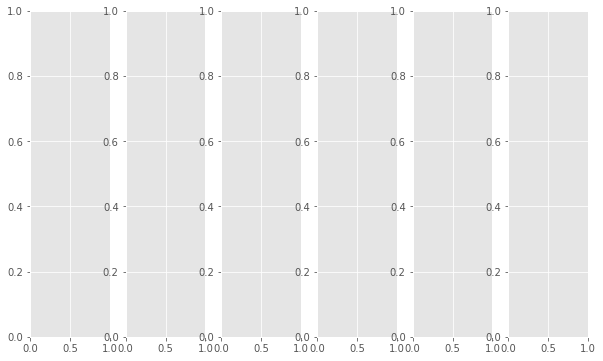

In [14]:
plt.figure()
df.plot(kind = 'box', subplots = True, layout = (1,6), sharex = False, sharey = False, title="Box-Plot of Price v/s Features", figsize=(10,6), ylabel="Price Range", xlabel="hello")

Open            AxesSubplot(0.125,0.125;0.110714x0.755)
High         AxesSubplot(0.257857,0.125;0.110714x0.755)
Low          AxesSubplot(0.390714,0.125;0.110714x0.755)
Close        AxesSubplot(0.523571,0.125;0.110714x0.755)
Adj Close    AxesSubplot(0.656429,0.125;0.110714x0.755)
Volume       AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

<Figure size 432x288 with 0 Axes>

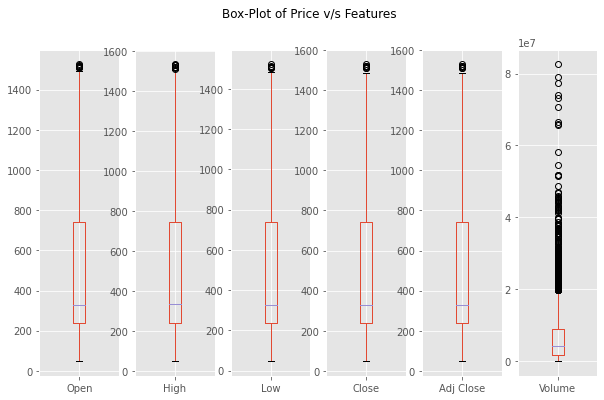

In [15]:
plt.figure()
df.plot(kind = 'box', subplots = True, layout = (1,6), sharex = False, sharey = False, title="Box-Plot of Price v/s Features", figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f344a8cc0>,
      dtype=object)

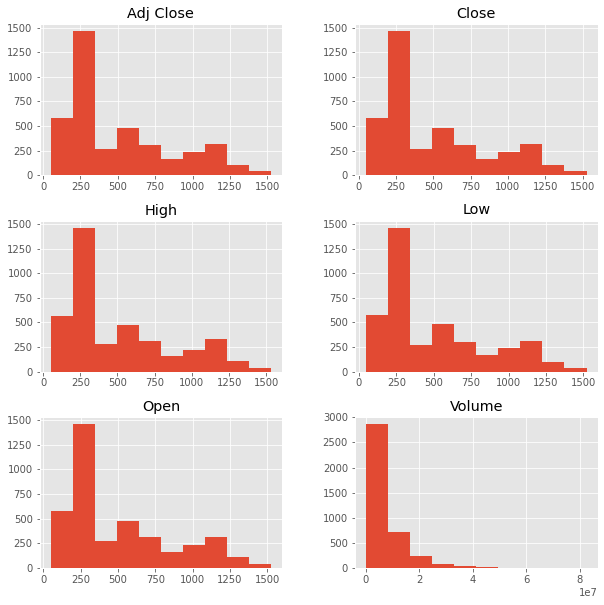

In [16]:
df.hist(figsize = (10,10))

In [17]:
'''#Skewness before and after applying Log transformation
print(df['Close'].skew())
Cskew = np.log(df['Close'])
print(Cskew.skew())

print(df['Volume'].skew())
vskew = np.log(df['Volume'])
print(vskew.skew())
'''

"#Skewness before and after applying Log transformation\nprint(df['Close'].skew())\nCskew = np.log(df['Close'])\nprint(Cskew.skew())\n\nprint(df['Volume'].skew())\nvskew = np.log(df['Volume'])\nprint(vskew.skew())\n"

In [18]:
# Percentage change in Open and Close Price 
df['OC_Change'] = (df['Close']-df['Open'])/df['Open']*100

In [19]:
# Percentage change in High and Low Price 
df['HL_Change'] = (df['High']-df['Low'])/df['Low']*100

In [20]:
df = df[['Close','HL_Change','OC_Change','Volume']]

In [21]:
print(df.tail()) 

                  Close  HL_Change  OC_Change   Volume
Date                                                  
2020-04-22  1263.209961   3.511517   1.418655  2093100
2020-04-23  1276.310059   2.183825   0.374347  1566200
2020-04-24  1279.310059   2.477096   1.438348  1640400
2020-04-27  1275.880005   2.139482  -1.552469  1600600
2020-04-28  1233.670044   4.532552  -4.212962  2898600


In [22]:
Close1 = df['Close'][-41:-1]
print(Close1)
len(Close1)
Close2 = Close1.to_numpy()
print(Close2)

Date
2020-03-02    1389.109985
2020-03-03    1341.390015
2020-03-04    1386.520020
2020-03-05    1319.040039
2020-03-06    1298.410034
2020-03-09    1215.560059
2020-03-10    1280.390015
2020-03-11    1215.410034
2020-03-12    1114.910034
2020-03-13    1219.729980
2020-03-16    1084.329956
2020-03-17    1119.800049
2020-03-18    1096.800049
2020-03-19    1115.290039
2020-03-20    1072.319946
2020-03-23    1056.619995
2020-03-24    1134.459961
2020-03-25    1102.489990
2020-03-26    1161.750000
2020-03-27    1110.709961
2020-03-30    1146.819946
2020-03-31    1162.810059
2020-04-01    1105.619995
2020-04-02    1120.839966
2020-04-03    1097.880005
2020-04-06    1186.920044
2020-04-07    1186.510010
2020-04-08    1210.280029
2020-04-09    1211.449951
2020-04-13    1217.560059
2020-04-14    1269.229980
2020-04-15    1262.469971
2020-04-16    1263.469971
2020-04-17    1283.250000
2020-04-20    1266.609985
2020-04-21    1216.339966
2020-04-22    1263.209961
2020-04-23    1276.310059
2020-04

### Features & Labels

In [23]:
forecast_Col = 'Close'
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_Col].shift(-forecast_out)
print(df['label'])

Date
2004-08-19    71.785927
2004-08-20    74.301498
2004-08-23    73.693779
2004-08-24    69.982689
2004-08-25    74.411087
                ...    
2020-04-22          NaN
2020-04-23          NaN
2020-04-24          NaN
2020-04-27          NaN
2020-04-28          NaN
Name: label, Length: 3950, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df.tail()

,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-04-22,1263.209961,3.511517,1.418655,2093100,NaN
2020-04-23,1276.310059,2.183825,0.374347,1566200,NaN
2020-04-24,1279.310059,2.477096,1.438348,1640400,NaN
2020-04-27,1275.880005,2.139482,-1.552469,1600600,NaN
2020-04-28,1233.670044,4.532552,-4.212962,2898600,NaN


In [25]:
df.dropna(inplace=True)
df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-02-25,1388.449951,4.032117,-3.108866,2478300,1263.209961
2020-02-26,1393.180054,2.661345,-0.212010,2202400,1276.310059
2020-02-27,1318.089966,4.140235,-3.228205,2978300,1279.310059
2020-02-28,1339.329956,5.518491,4.839918,3790600,1275.880005
2020-03-02,1389.109985,4.827731,2.774469,2431500,1233.670044


### Data Splitting

In [26]:
X  =  np.array(df.drop(['label'], axis = 1))
Y  =  np.array(df['label'])

In [27]:
print(len(X),len(Y))

3910 3910


In [28]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.2)

In [29]:
a = np.shape(X_train)
b = np.shape(Y_train)
c = np.shape(X_test)
d = np.shape(Y_test)
print(a,b,c,d)

(3128, 4) (3128,) (782, 4) (782,)



# Linear Regression

In [30]:
startlr = time.time()

lr = LinearRegression()
lr.fit(X_train,Y_train)

endlr = time.time()

time_lr = endlr-startlr

print('Training Time :- {}'.format(time_lr))

Training Time :- 0.026930809020996094


In [31]:
accuracy = lr.score(X_test,Y_test)
print(accuracy)

0.978739944643914


In [32]:
len(Y_test)

782

In [33]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = lr.predict(X_old)
print(Forecast_set)

[1294.76681143 1294.33930719 1308.7821538  1313.24923339 1301.97243817
 1301.09272987 1300.7310927  1312.69589439 1335.21824927 1322.09511959
 1317.38188337 1304.42171722 1303.24990868 1297.30590194 1308.85519604
 1315.8748199  1315.53573634 1308.19857906 1291.29731654 1296.95790333
 1321.3579516  1329.87043224 1342.14340159 1344.20214567 1346.10234837
 1347.17761108 1351.33666202 1349.20724357 1362.17900371 1355.86520205
 1353.96361527 1357.29473179 1349.15914269 1350.56542504 1346.25070062
 1361.58531853 1353.33178161 1337.60410688 1339.04073204 1366.9236631 ]


In [34]:
date= ['2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-16',
       '2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
       '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date        Close   Prediction
0   2020-03-03  1389.109985  1294.766811
1   2020-03-04  1341.390015  1294.339307
2   2020-03-05  1386.520020  1308.782154
3   2020-03-06  1319.040039  1313.249233
4   2020-03-09  1298.410034  1301.972438
5   2020-03-10  1215.560059  1301.092730
6   2020-03-11  1280.390015  1300.731093
7   2020-03-12  1215.410034  1312.695894
8   2020-03-13  1114.910034  1335.218249
9   2020-03-16  1219.729980  1322.095120
10  2020-03-17  1084.329956  1317.381883
11  2020-03-18  1119.800049  1304.421717
12  2020-03-19  1096.800049  1303.249909
13  2020-03-20  1115.290039  1297.305902
14  2020-03-23  1072.319946  1308.855196
15  2020-03-24  1056.619995  1315.874820
16  2020-03-25  1134.459961  1315.535736
17  2020-03-26  1102.489990  1308.198579
18  2020-03-27  1161.750000  1291.297317
19  2020-03-30  1110.709961  1296.957903
20  2020-03-31  1146.819946  1321.357952
21  2020-04-01  1162.810059  1329.870432
22  2020-04-02  1105.619995  1342.143402
23  2020-04-03  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


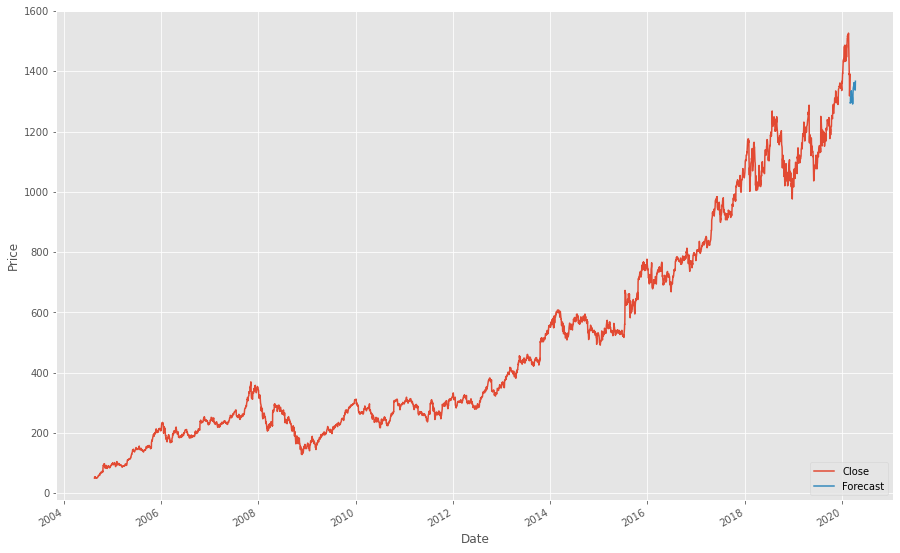

In [35]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in Forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Close'].plot(figsize = (15,10))
df['Forecast'].plot(figsize = (15,10))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Decision Tree

In [36]:
startdt = time.time()

tree = DecisionTreeRegressor(random_state = 0 , max_depth=6)
tree.fit(X_train, Y_train)

enddt = time.time()

time_dt = enddt-startdt

print('Training Time :- {}'.format(time_dt))

print('Accuracy:- {}'.format(tree.score(X_test, Y_test)))

Training Time :- 0.00955510139465332
Accuracy:- 0.9835289188661797


In [37]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = tree.predict(X_old)
print(Forecast_set)

[1165.67675698 1222.8540039  1259.01460623 1259.01460623 1259.01460623
 1259.01460623 1259.01460623 1259.01460623 1177.1779908  1259.01460623
 1222.8540039  1177.1779908  1259.01460623 1222.8540039  1222.8540039
 1165.67675698 1165.67675698 1165.67675698 1222.8540039  1222.8540039
 1165.67675698 1165.67675698 1222.8540039  1222.8540039  1222.8540039
 1177.1779908  1259.01460623 1259.01460623 1259.01460623 1259.01460623
 1259.01460623 1259.01460623 1259.01460623 1259.01460623 1436.51618295
 1177.1779908  1259.01460623 1259.01460623 1259.01460623 1436.51618295]


In [38]:
date= ['2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-16',
       '2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
       '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date        Close   Prediction
0   2020-03-03  1389.109985  1165.676757
1   2020-03-04  1341.390015  1222.854004
2   2020-03-05  1386.520020  1259.014606
3   2020-03-06  1319.040039  1259.014606
4   2020-03-09  1298.410034  1259.014606
5   2020-03-10  1215.560059  1259.014606
6   2020-03-11  1280.390015  1259.014606
7   2020-03-12  1215.410034  1259.014606
8   2020-03-13  1114.910034  1177.177991
9   2020-03-16  1219.729980  1259.014606
10  2020-03-17  1084.329956  1222.854004
11  2020-03-18  1119.800049  1177.177991
12  2020-03-19  1096.800049  1259.014606
13  2020-03-20  1115.290039  1222.854004
14  2020-03-23  1072.319946  1222.854004
15  2020-03-24  1056.619995  1165.676757
16  2020-03-25  1134.459961  1165.676757
17  2020-03-26  1102.489990  1165.676757
18  2020-03-27  1161.750000  1222.854004
19  2020-03-30  1110.709961  1222.854004
20  2020-03-31  1146.819946  1165.676757
21  2020-04-01  1162.810059  1165.676757
22  2020-04-02  1105.619995  1222.854004
23  2020-04-03  

# K-NN

In [39]:
startknn = time.time()

knn = KNeighborsRegressor(13)
knn.fit(X_train, Y_train)

endknn = time.time()

time_knn = endknn - startknn

print('Training Time:- {}'.format(time_knn))
print('Accuracy:- {}'.format(knn.score(X_test, Y_test)))

Training Time:- 0.006001472473144531
Accuracy:- 0.6739582416333756


In [40]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = knn.predict(X_old)
print(Forecast_set)

[ 987.64465554  999.10383031 1006.01076569  952.40082969  863.947829
  901.94000246 1111.04672     903.61768515  793.62944615  376.84903531
  682.91252492  925.91882808  874.37792969  861.79845254  826.68088
  672.37051862  793.57423762  870.713177    943.19137808 1041.52846115
 1161.15369592  988.37862931  882.29999246  840.16354138 1024.146907
 1001.82512492  996.27003592  976.29978115 1085.70999369  736.72683708
  945.22577838 1087.313838   1069.85030415 1190.30306292  854.26654269
  904.95094177 1041.45460862 1046.28153638 1061.32999823  912.45060846]


In [41]:
date= ['2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-16',
       '2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
       '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date        Close   Prediction
0   2020-03-03  1389.109985   987.644656
1   2020-03-04  1341.390015   999.103830
2   2020-03-05  1386.520020  1006.010766
3   2020-03-06  1319.040039   952.400830
4   2020-03-09  1298.410034   863.947829
5   2020-03-10  1215.560059   901.940002
6   2020-03-11  1280.390015  1111.046720
7   2020-03-12  1215.410034   903.617685
8   2020-03-13  1114.910034   793.629446
9   2020-03-16  1219.729980   376.849035
10  2020-03-17  1084.329956   682.912525
11  2020-03-18  1119.800049   925.918828
12  2020-03-19  1096.800049   874.377930
13  2020-03-20  1115.290039   861.798453
14  2020-03-23  1072.319946   826.680880
15  2020-03-24  1056.619995   672.370519
16  2020-03-25  1134.459961   793.574238
17  2020-03-26  1102.489990   870.713177
18  2020-03-27  1161.750000   943.191378
19  2020-03-30  1110.709961  1041.528461
20  2020-03-31  1146.819946  1161.153696
21  2020-04-01  1162.810059   988.378629
22  2020-04-02  1105.619995   882.299992
23  2020-04-03  

# Neural Network Implementation

In [42]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Loading Dataset for LSTM

In [43]:
dfl = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock prediction project/GOOG2.csv',index_col="Date",parse_dates=True)
#Show the data
dfl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...
2020-04-22,1245.540039,1285.613037,1242.000000,1263.209961,1263.209961,2093100
2020-04-23,1271.550049,1293.310059,1265.670044,1276.310059,1276.310059,1566200
2020-04-24,1261.170044,1280.400024,1249.449951,1279.310059,1279.310059,1640400


### Preprocessing & Feature Extraction

In [44]:
#Get the number of rows and columns in the data set
dfl.shape

(3950, 6)

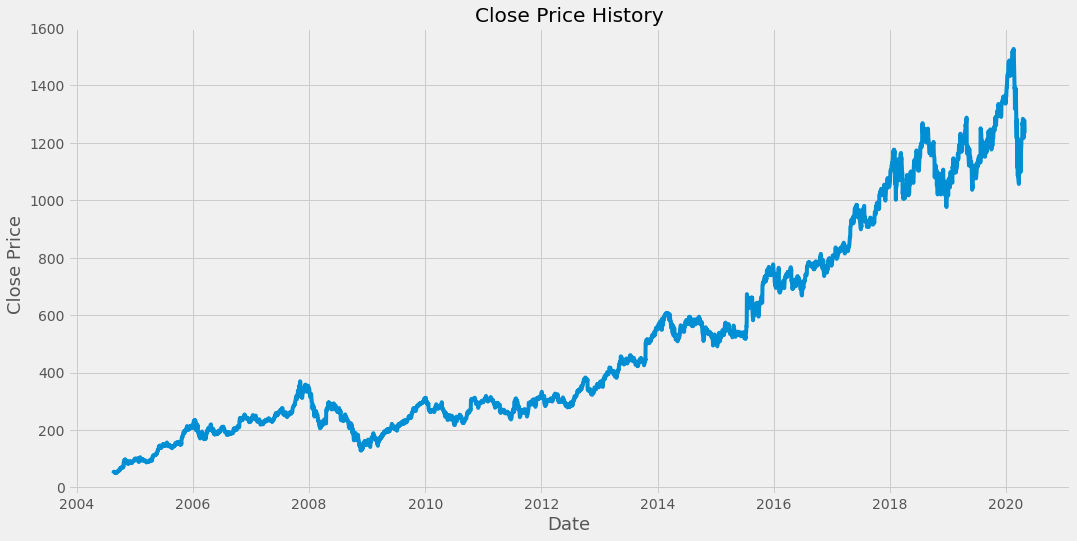

In [45]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dfl['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [46]:

#Create a new dataframe with only the 'Close column
data = dfl.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

3160

In [47]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.11307572e-04],
       [2.79949983e-03],
       [3.16714518e-03],
       ...,
       [8.32497375e-01],
       [8.30174862e-01],
       [8.01594206e-01]])

In [48]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_trainl = []
y_trainl = []

for i in range(60, len(train_data)):
    x_trainl.append(train_data[i-60:i, 0])
    y_trainl.append(train_data[i, 0])
    if i<= 61:
        print(x_trainl)
        print(y_trainl)
        print()

[array([1.11307572e-04, 2.79949983e-03, 3.16714518e-03, 1.63922502e-03,
       2.02036376e-03, 2.66458425e-03, 2.07095583e-03, 6.74577906e-04,
       7.96002809e-04, 8.09494841e-05, 5.05934276e-04, 0.00000000e+00,
       5.29544993e-04, 7.72392091e-04, 7.75765438e-04, 1.79437797e-03,
       2.52629803e-03, 3.87208117e-03, 4.04409815e-03, 4.70855872e-03,
       5.89581557e-03, 6.52654809e-03, 6.01386712e-03, 6.19600414e-03,
       7.01898898e-03, 6.68507168e-03, 6.15552940e-03, 9.05621676e-03,
       1.04795767e-02, 9.98038914e-03, 1.09855110e-02, 1.18219858e-02,
       1.29384126e-02, 1.25033138e-02, 1.31003129e-02, 1.27225495e-02,
       1.18894426e-02, 1.26112453e-02, 1.37917548e-02, 1.41627762e-02,
       1.48744535e-02, 1.65777640e-02, 1.61662732e-02, 1.36534686e-02,
       1.66519674e-02, 2.44264845e-02, 2.94757025e-02, 2.75868836e-02,
       2.89933816e-02, 3.14657108e-02, 3.05685205e-02, 3.23865099e-02,
       3.19952538e-02, 3.09159285e-02, 2.85650235e-02, 2.33876346e-02,
     

In [49]:
#Convert the x_train and y_train to numpy arrays 
x_trainl, y_trainl = np.array(x_trainl), np.array(y_trainl)

In [50]:
#Reshape the data
x_trainl = np.reshape(x_trainl, (x_trainl.shape[0], x_trainl.shape[1], 1))
x_trainl.shape

(3100, 60, 1)

## Build the LSTM model

In [51]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape= (x_trainl.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [53]:
#Train the model
lstm_start = time.time()

history = model.fit(x_trainl, y_trainl, epochs=200, batch_size=32)
lstm_end = time.time()

total_lstm = lstm_end - lstm_start

Epoch 1/200
97/97 [==============================] - 1s 8ms/step - loss: 0.0024
Epoch 2/200
97/97 [==============================] - 1s 7ms/step - loss: 9.6997e-05
Epoch 3/200
97/97 [==============================] - 1s 7ms/step - loss: 9.6874e-05
Epoch 4/200
97/97 [==============================] - 1s 7ms/step - loss: 8.5833e-05
Epoch 5/200
97/97 [==============================] - 1s 7ms/step - loss: 8.9625e-05
Epoch 6/200
97/97 [==============================] - 1s 7ms/step - loss: 8.3799e-05
Epoch 7/200
97/97 [==============================] - 1s 7ms/step - loss: 7.5361e-05
Epoch 8/200
97/97 [==============================] - 1s 7ms/step - loss: 7.4648e-05
Epoch 9/200
97/97 [==============================] - 1s 7ms/step - loss: 7.5282e-05
Epoch 10/200
97/97 [==============================] - 1s 7ms/step - loss: 7.6797e-05
Epoch 11/200
97/97 [==============================] - 1s 7ms/step - loss: 7.6367e-05
Epoch 12/200
97/97 [==============================] - 1s 7ms/step - loss: 7.03

In [54]:
import pickle

# .dump to save the classifier model and wb is mode


pickle.dump(model, open('stockprice.pkl','wb'))

load_model = pickle.load(open('stockprice.pkl','rb'))

pr1 = load_model.predict(x_test1)
prl = scaler.inverse_transform(pr1)

TypeError: ignored

In [55]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((pr1 - y_testl)**2)))
rmse

NameError: ignored

In [56]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_testl = []
y_testl = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_testl.append(test_data[i-60:i, 0])

In [57]:
#Convert the data to a numpy array
x_testl = np.array(x_testl)

In [58]:
#Reshape the data
x_testl = np.reshape(x_testl, (x_testl.shape[0], x_testl.shape[1], 1 ))

In [59]:
#Get the models predicted price values 
predictionsl = model.predict(x_testl)
predictionsl = scaler.inverse_transform(predictionsl)

In [60]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictionsl - y_testl)**2)))
rmse

27.178054357733238

In [61]:
from sklearn.metrics import mean_squared_error
rr = mean_squared_error(y_testl, predictionsl)
#mse = sklearn.metrics.mean_squared_error(y_testl, predictionsl)

rmse1 = math.sqrt(rr)

print(rmse1)

27.178054357733238


### Visualizing Results of LSTM Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


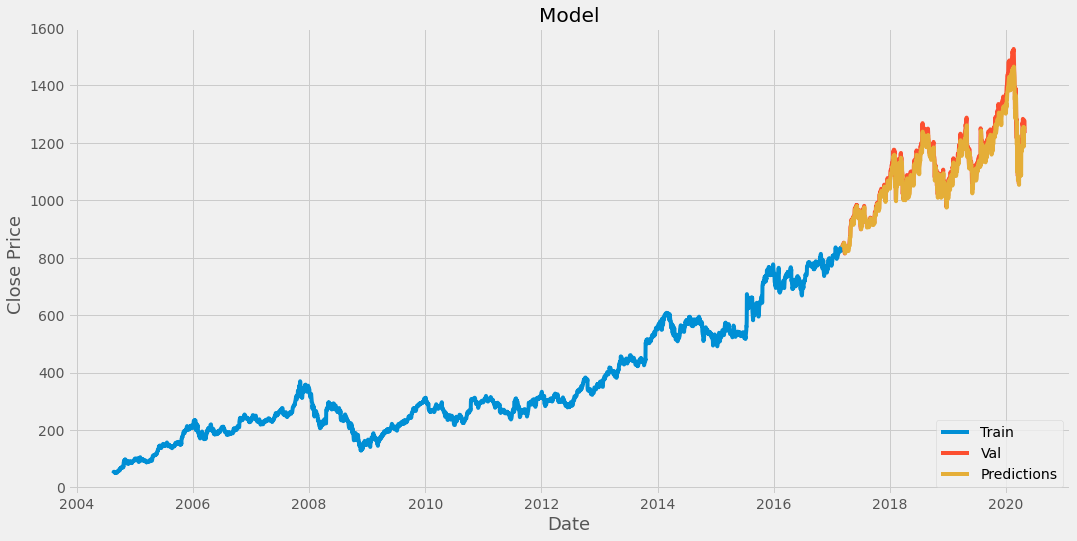

In [62]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsl
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [63]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-03-09,838.679993,835.768433
2017-03-10,843.250000,838.688782
2017-03-13,845.539978,843.093140
2017-03-14,845.619995,844.964050
2017-03-15,847.200012,844.687012
...,...,...
2020-04-22,1263.209961,1186.146973
2020-04-23,1276.310059,1244.880249
2020-04-24,1279.310059,1253.234619


In [64]:
valid.tail(10)

,Close,Predictions
Date,,
2020-04-15,1262.469971,1246.972778
2020-04-16,1263.469971,1231.798584
2020-04-17,1283.250000,1232.529785
2020-04-20,1266.609985,1254.874634
2020-04-21,1216.339966,1235.338867
2020-04-22,1263.209961,1186.146973
2020-04-23,1276.310059,1244.880249
2020-04-24,1279.310059,1253.234619
2020-04-27,1275.880005,1251.200073


In [65]:
lstm_temp_pred = valid[['Predictions']].tail(40)
lstm_temp_ori = valid[['Close']].tail(40)

In [66]:
lstm_temp_pred.reset_index(drop=True, inplace=True)
lstm_temp_ori.reset_index(drop=True, inplace=True)

In [67]:
lstm_temp_pred = lstm_temp_pred.values.tolist()
lstm_temp_ori = lstm_temp_ori.values.tolist()

In [68]:
lstm = []
original = []
for i in range(40):
    lstm.append(lstm_temp_pred[i][-1])
    original.append(lstm_temp_ori[i][-1])

### Visualizing Result of Supervised Learning algorithms

In [69]:
days = [int(i) for i in range(20)]

predictions = {'Actual Price':original,
               'Linear Regression':lr.predict(X_old),
              'KNN':knn.predict(X_old),
              'Decision Tree':tree.predict(X_old),
              'LSTM':lstm}

predictions = pd.DataFrame(predictions)

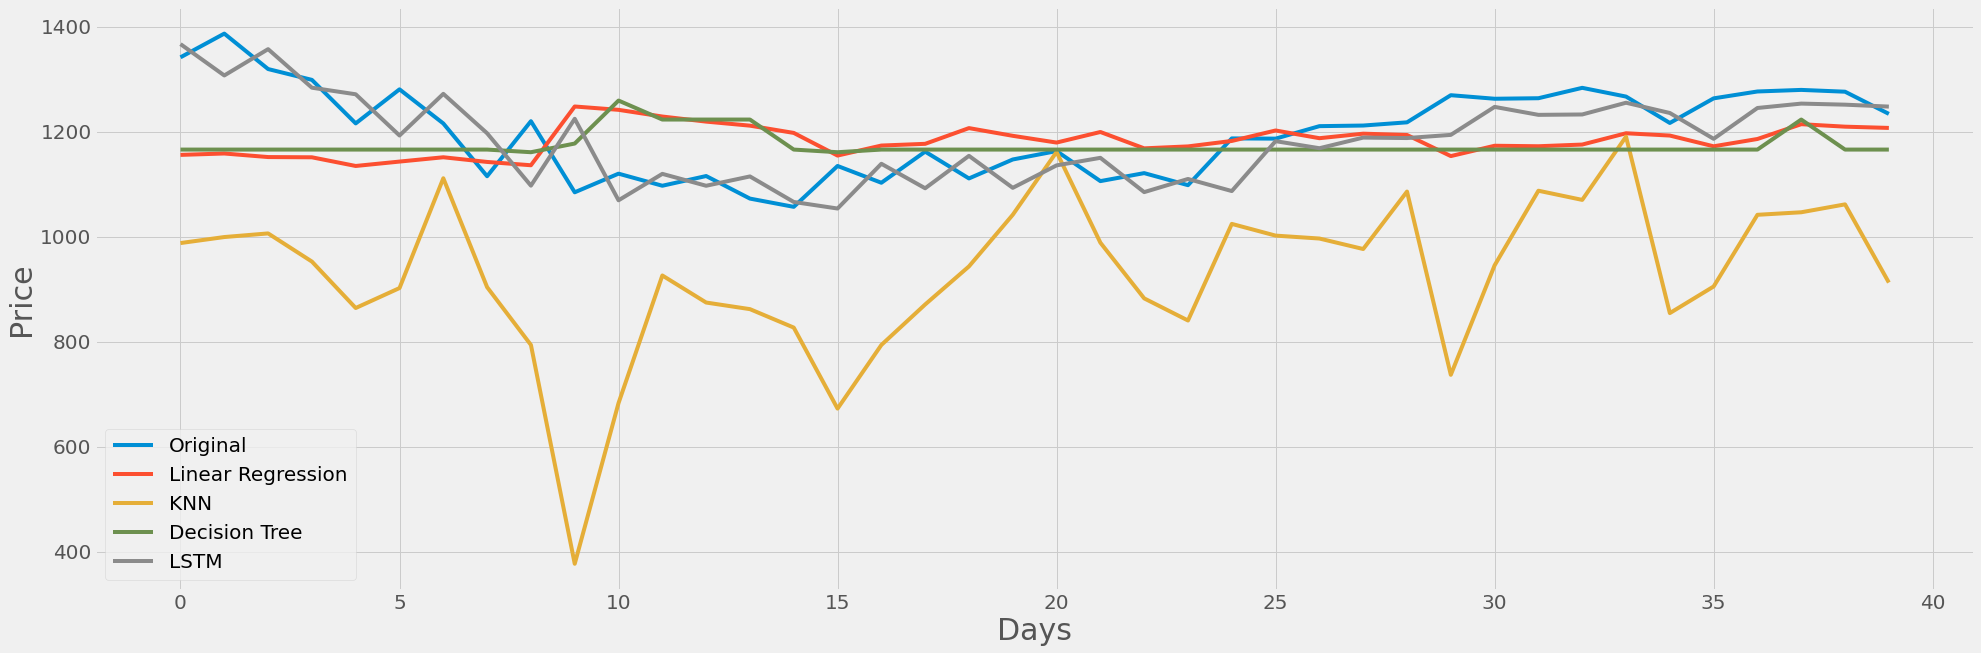

In [70]:
predictions['Actual Price'].plot(figsize = (30,10), fontsize = 20)
predictions['Linear Regression'].plot(figsize = (30,10), fontsize = 20)
predictions['KNN'].plot(figsize = (30,10), fontsize = 20)
predictions['Decision Tree'].plot(figsize = (30,10), fontsize = 20)
predictions['LSTM'].plot(figsize = (30,10), fontsize = 20)
plt.legend(['Original','Linear Regression', 'KNN', 'Decision Tree', 'LSTM'], fontsize=20)
plt.xlabel('Days', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.show()

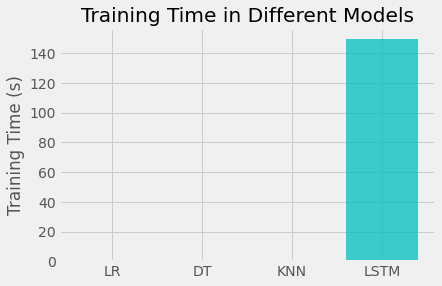

In [71]:
objects = ('LR', 'DT', 'KNN', 'LSTM')
y_pos = np.arange(len(objects))
performance = [time_lr, time_dt, time_knn, total_lstm]

plt.bar(y_pos, performance, align='center', color='c', alpha = 0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Training Time (s)')
plt.title('Training Time in Different Models')

plt.show()

In [72]:
predictions['Date'] = date

In [73]:
predictions.set_index('Date', inplace= True)

In [74]:
predictions[['Actual Price', 'Linear Regression']]

,Actual Price,Linear Regression
Date,,
2020-03-03,1341.390015,1155.559306
2020-03-04,1386.520020,1158.208346
2020-03-05,1319.040039,1151.427798
2020-03-06,1298.410034,1150.962068
2020-03-09,1215.560059,1134.452438
2020-03-10,1280.390015,1142.822850
2020-03-11,1215.410034,1151.029583
2020-03-12,1114.910034,1142.125668
2020-03-13,1219.729980,1135.822560


In [75]:
predictions[['Actual Price', 'KNN']]

,Actual Price,KNN
Date,,
2020-03-03,1341.390015,987.644656
2020-03-04,1386.520020,999.103830
2020-03-05,1319.040039,1006.010766
2020-03-06,1298.410034,952.400830
2020-03-09,1215.560059,863.947829
2020-03-10,1280.390015,901.940002
2020-03-11,1215.410034,1111.046720
2020-03-12,1114.910034,903.617685
2020-03-13,1219.729980,793.629446


In [76]:
predictions[['Actual Price', 'Decision Tree']]

,Actual Price,Decision Tree
Date,,
2020-03-03,1341.390015,1165.676757
2020-03-04,1386.520020,1165.676757
2020-03-05,1319.040039,1165.676757
2020-03-06,1298.410034,1165.676757
2020-03-09,1215.560059,1165.676757
2020-03-10,1280.390015,1165.676757
2020-03-11,1215.410034,1165.676757
2020-03-12,1114.910034,1165.676757
2020-03-13,1219.729980,1160.651415


In [77]:
predictions[['Actual Price', 'LSTM']]

,Actual Price,LSTM
Date,,
2020-03-03,1341.390015,1366.557007
2020-03-04,1386.520020,1306.820435
2020-03-05,1319.040039,1356.938599
2020-03-06,1298.410034,1283.500488
2020-03-09,1215.560059,1270.975586
2020-03-10,1280.390015,1192.491455
2020-03-11,1215.410034,1271.795166
2020-03-12,1114.910034,1196.731567
2020-03-13,1219.729980,1096.978271


# Comparison Table for last 10 Days

In [78]:
days = [int(i) for i in range(20)]

predictions_comp = {'Actual Price':original,
               'Linear Regression':lr.predict(X_old),
              'KNN Prediction':knn.predict(X_old),
              'Decision Tree':tree.predict(X_old),
              'LSTM Prediction':lstm}

predictions_comp = pd.DataFrame(predictions_comp)

In [79]:
predictions_comp['Date'] = date
predictions_comp.set_index('Date', inplace= True)

In [80]:
pl = predictions_comp[['Actual Price', 'Linear Regression']]
pl.tail(10)

,Actual Price,Linear Regression
Date,,
2020-04-15,1262.469971,1172.949583
2020-04-16,1263.469971,1172.014587
2020-04-17,1283.250000,1175.225965
2020-04-20,1266.609985,1196.755017
2020-04-21,1216.339966,1192.377164
2020-04-22,1263.209961,1171.918407
2020-04-23,1276.310059,1185.834514
2020-04-24,1279.310059,1214.023286
2020-04-27,1275.880005,1209.297284


In [81]:
pl = predictions_comp[['Actual Price', 'KNN Prediction']]
pl.tail(10)

,Actual Price,KNN Prediction
Date,,
2020-04-15,1262.469971,945.225778
2020-04-16,1263.469971,1087.313838
2020-04-17,1283.250000,1069.850304
2020-04-20,1266.609985,1190.303063
2020-04-21,1216.339966,854.266543
2020-04-22,1263.209961,904.950942
2020-04-23,1276.310059,1041.454609
2020-04-24,1279.310059,1046.281536
2020-04-27,1275.880005,1061.329998


In [82]:
pl = predictions_comp[['Actual Price', 'Decision Tree']]
pl.tail(10)

,Actual Price,Decision Tree
Date,,
2020-04-15,1262.469971,1165.676757
2020-04-16,1263.469971,1165.676757
2020-04-17,1283.250000,1165.676757
2020-04-20,1266.609985,1165.676757
2020-04-21,1216.339966,1165.676757
2020-04-22,1263.209961,1165.676757
2020-04-23,1276.310059,1165.676757
2020-04-24,1279.310059,1222.854004
2020-04-27,1275.880005,1165.676757


In [83]:
pl = predictions_comp[['Actual Price', 'LSTM Prediction']]
pl.tail(10)

,Actual Price,LSTM Prediction
Date,,
2020-04-15,1262.469971,1246.972778
2020-04-16,1263.469971,1231.798584
2020-04-17,1283.250000,1232.529785
2020-04-20,1266.609985,1254.874634
2020-04-21,1216.339966,1235.338867
2020-04-22,1263.209961,1186.146973
2020-04-23,1276.310059,1244.880249
2020-04-24,1279.310059,1253.234619
2020-04-27,1275.880005,1251.200073


In [84]:
pl = predictions_comp[['Actual Price', 'LSTM Prediction', 'Linear Regression', 'Decision Tree', 'KNN Prediction']]
pl.columns =[' Actual Price ', 'LSTM    ', 'Linear Regression', 'Decision Tree','K-NN'] 

pl.tail(10)

,Actual Price,LSTM,Linear Regression,Decision Tree,K-NN
Date,,,,,
2020-04-15,1262.469971,1246.972778,1172.949583,1165.676757,945.225778
2020-04-16,1263.469971,1231.798584,1172.014587,1165.676757,1087.313838
2020-04-17,1283.250000,1232.529785,1175.225965,1165.676757,1069.850304
2020-04-20,1266.609985,1254.874634,1196.755017,1165.676757,1190.303063
2020-04-21,1216.339966,1235.338867,1192.377164,1165.676757,854.266543
2020-04-22,1263.209961,1186.146973,1171.918407,1165.676757,904.950942
2020-04-23,1276.310059,1244.880249,1185.834514,1165.676757,1041.454609
2020-04-24,1279.310059,1253.234619,1214.023286,1222.854004,1046.281536
2020-04-27,1275.880005,1251.200073,1209.297284,1165.676757,1061.329998


In [85]:
ppl = predictions_comp[['Actual Price', 'LSTM Prediction', 'Linear Regression', 'Decision Tree', 'KNN Prediction']]
ppl.columns =[' Actual Price ', 'LSTM    ', 'Linear Reg.', 'Decision Tree','K-NN'] 

ppl.tail(10)

,Actual Price,LSTM,Linear Reg.,Decision Tree,K-NN
Date,,,,,
2020-04-15,1262.469971,1246.972778,1172.949583,1165.676757,945.225778
2020-04-16,1263.469971,1231.798584,1172.014587,1165.676757,1087.313838
2020-04-17,1283.250000,1232.529785,1175.225965,1165.676757,1069.850304
2020-04-20,1266.609985,1254.874634,1196.755017,1165.676757,1190.303063
2020-04-21,1216.339966,1235.338867,1192.377164,1165.676757,854.266543
2020-04-22,1263.209961,1186.146973,1171.918407,1165.676757,904.950942
2020-04-23,1276.310059,1244.880249,1185.834514,1165.676757,1041.454609
2020-04-24,1279.310059,1253.234619,1214.023286,1222.854004,1046.281536
2020-04-27,1275.880005,1251.200073,1209.297284,1165.676757,1061.329998
